<b>Part 1: Demonstrate "Over-fitting" and solve the same using "Dropout technique". 

Code without DropOut Technique

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8719 - loss: 1.0446 - val_accuracy: 0.8467 - val_loss: 0.5583
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8625 - loss: 0.4068 - val_accuracy: 0.8467 - val_loss: 0.4843
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8439 - loss: 0.4337 - val_accuracy: 0.8467 - val_loss: 0.5122
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8285 - loss: 0.4686 - val_accuracy: 0.8467 - val_loss: 0.4661
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8461 - loss: 0.4172 - val_accuracy: 0.8467 - val_loss: 0.4703
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8480 - loss: 0.4035 - val_accuracy: 0.8467 - val_loss: 0.4630
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8486 - loss: 0.4031 - val_accuracy: 0.8467 - val_loss: 0.4646
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8558 - loss: 0.3922 - val_accuracy: 0.8467 - 

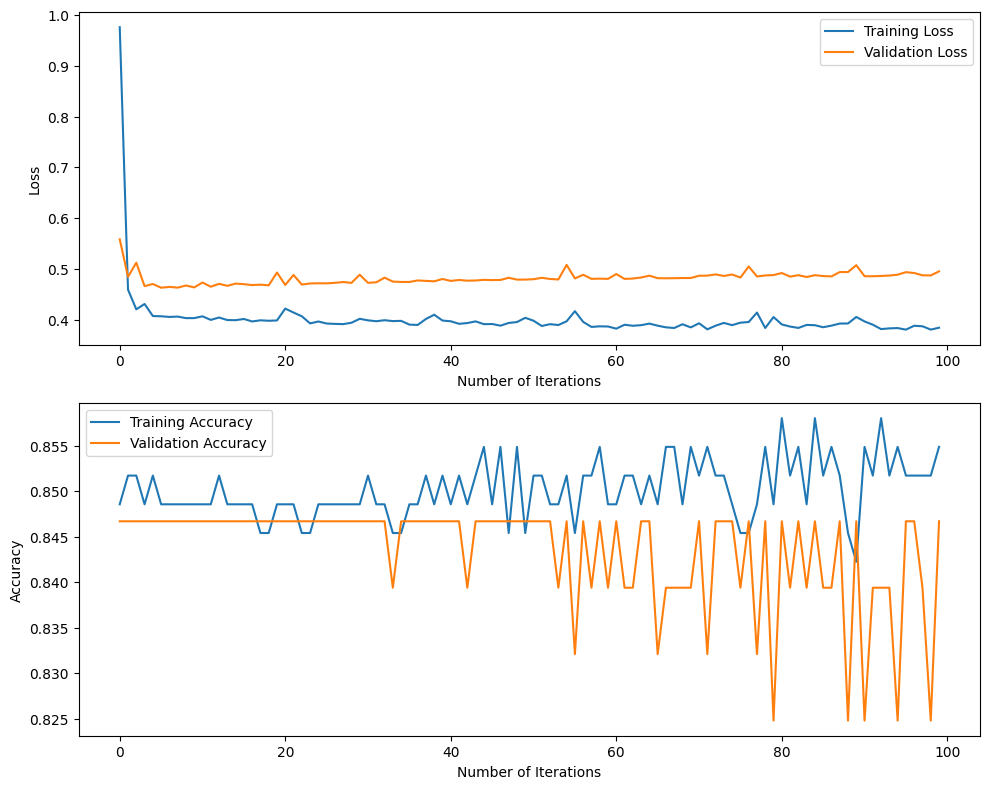

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4949 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Read data from csv file

df = pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\thoracic_surgery.csv")


X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

y.value_counts()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)


def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))


Code with DropOut Technique

In [1]:
from tensorflow.keras.layers import Dropout


def dl_model_with_dropout(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.8))  # Adding dropout with rate 0.5
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.8
                      ))  # Adding dropout with rate 0.5
    model.add(Dense(1, activation='sigmoid'))

    # Model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,
                     validation_data=(X_test, Y_test))

    # Plotting the training history
    plt.figure(figsize=(10, 8))
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model


# Train the model with dropout
model_dropout = dl_model_with_dropout(X_train, X_test, Y_train, Y_test)
model_dropout.evaluate(X_test, Y_test)

y_pred = model_dropout.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))

NameError: name 'X_train' is not defined

<b> Part 2: For your project definition demonstrate applicable task out of prediction and classification. 

Use model to predict the risk of death in 1 year of the patient after thoracic surgery

In [7]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("my_model_undersampling.keras")

# Prepare input data
# live data 2, 2.88, 2.16, 1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 60


original_data_death = {
    'Diagnosis': 3,
    'FVC': 0.44,
    'FEV1': 0.96,
    'Performance': 2,
    'Pain': 0,
    'Haemoptysis': 1,
    'Dyspnoea': 0,
    'Cough': 1,
    'Weakness': 1,
    'Tumor_Size': 4,
    'Diabetes_Mellitus': 0,
    'PAD': 0,
    'Smoking': 0,
    'Age': 100
}
original_data_life = {
    'Diagnosis': 3,
    'FVC': 1.96,
    'FEV1': 1.4,
    'Performance': 1,
    'Pain': 0,
    'Haemoptysis': 0,
    'Dyspnoea': 0,
    'Cough': 1,
    'Weakness': 0,
    'Tumor_Size': 1,
    'Diabetes_Mellitus': 0,
    'PAD': 0,
    'Smoking': 0,
    'Age': 77
}


# Create a DataFrame from the input data
input_df = pd.DataFrame([original_data_death])
# input_df = pd.DataFrame([original_data_life])

# Make predictions
predictions = model.predict(input_df)

print(predictions)

# Assuming predictions closer to 0 represent 'live' and closer to 1 represent 'death'
predicted_class = ['live' if pred < 0.5 else 'death' for pred in predictions]

# Print predictions
print("Predicted class for the input data:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[0.37561947]]
Predicted class for the input data: ['live']


<b> Part 6: Comparison of outcomes with and without optimization

With adam optimizer

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1664 - loss: 6.7974 - val_accuracy: 0.1533 - val_loss: 3.1717
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1811 - loss: 2.2848 - val_accuracy: 0.8102 - val_loss: 0.5182
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8521 - loss: 0.4674 - val_accuracy: 0.8467 - val_loss: 0.5588
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8466 - loss: 0.5429 - val_accuracy: 0.8467 - val_loss: 0.6134
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8692 - loss: 0.4846 - val_accuracy: 0.8467 - val_loss: 0.5419
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8368 - loss: 0.5346 - val_accuracy: 0.8394 - val_loss: 0.4610
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8499 - loss: 0.4245 - val_accuracy: 0.8394 - val_loss: 0.4473
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8474 - loss: 0.4479 - val_accuracy: 0.8467 

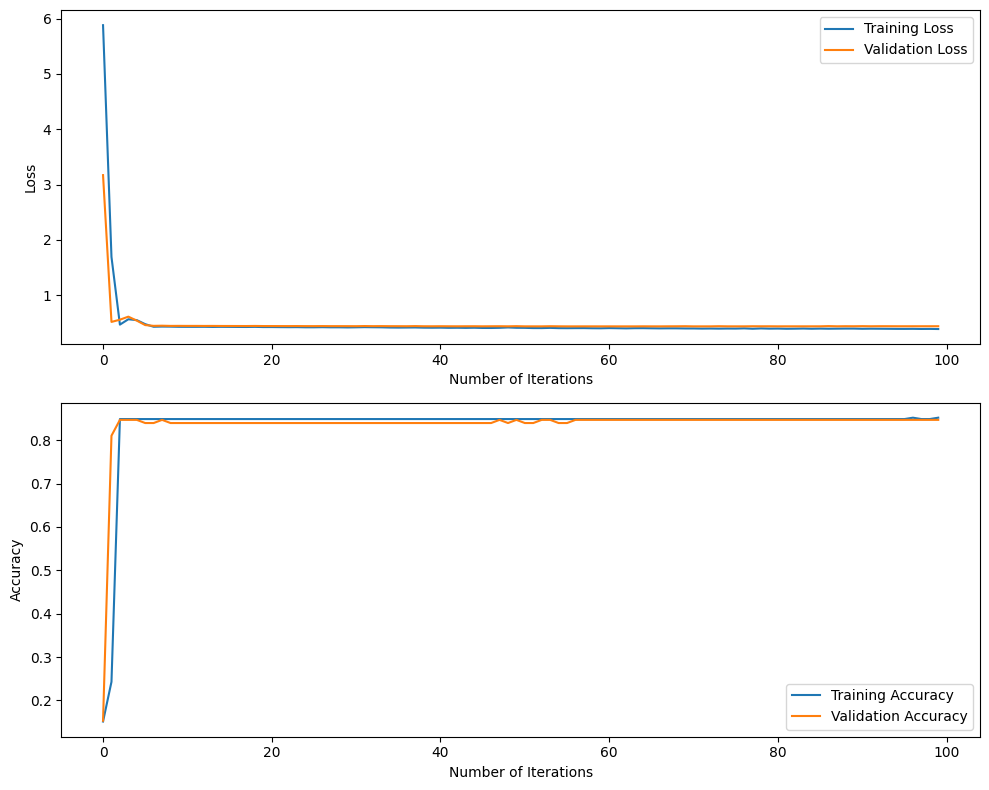

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4637  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))

Without adam optimizer

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6405 - loss: 0.6822 - val_accuracy: 0.8248 - val_loss: 0.4689
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8235 - loss: 0.4981 - val_accuracy: 0.8394 - val_loss: 0.4722
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.4207 - val_accuracy: 0.8248 - val_loss: 0.4639
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.4637 - val_accuracy: 0.8248 - val_loss: 0.4651
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8656 - loss: 0.3953 - val_accuracy: 0.7226 - val_loss: 0.5598
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8148 - loss: 0.4747 - val_accuracy: 0.8248 - val_loss: 0.4592
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8513 - loss: 0.4349 - val_accuracy: 0.8248 - val_loss: 0.4589
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8470 - loss: 0.4377 - val_accuracy: 0.8467 - 

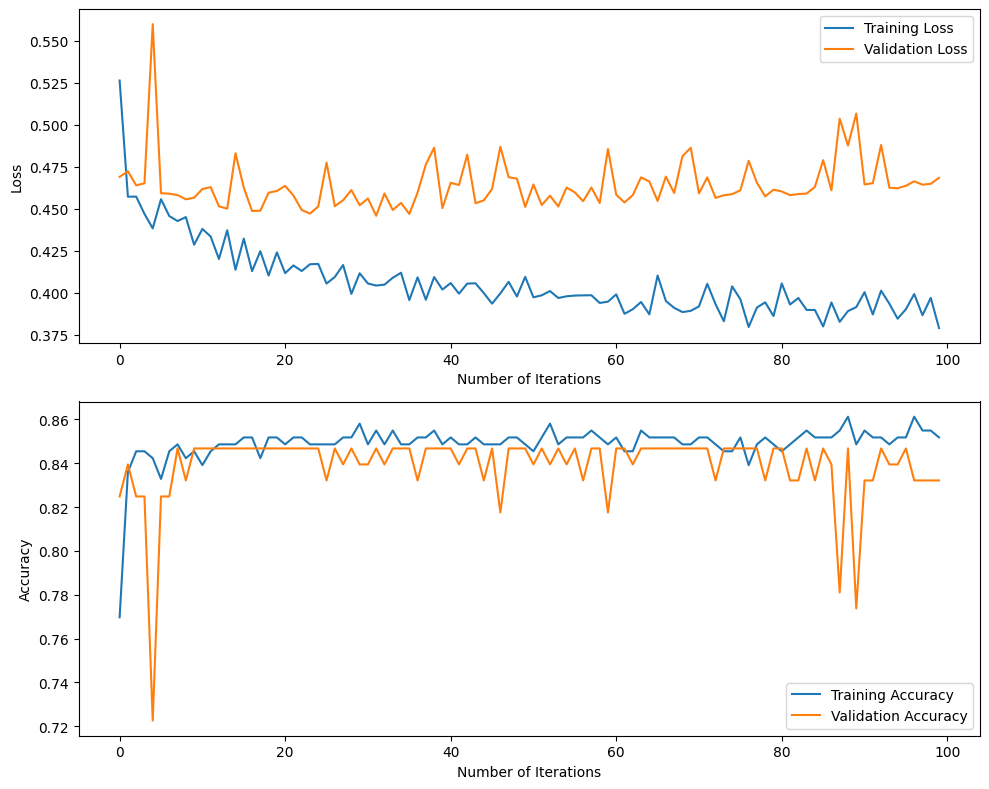

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.4775 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       116
           1       0.25      0.05      0.08        21

    accuracy                           0.83       137
   macro avg       0.55      0.51      0.49       137
weighted avg       0.76      0.83      0.78       137



In [9]:
def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # model summary
    model.summary()

    model.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train, epochs=100,
                     validation_data=(X_test, Y_test))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model


model = dl_model(X_train, X_test, Y_train, Y_test)

model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

print("classification report : \n", classification_report(Y_test, y_pred))